In [3]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()

rdkit is already installed
rdkit is already installed


In [0]:
#RDkit 적용
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

##Ⅰ SMILES-A Simplified Chemical Language
SMILES(Simplified Moledcular Input Line Entry System)
<br> 분자와 반응을 입력하고 나타내는 줄 표기법입니다.
SMILES는 컴퓨터 데이터 구조가 아니라 언어 구조이기 때문에 유용하게 쓰입니다. 구조에 대한 SMILES 표현은 많은 화학 정보를 포함하고 있습니다. 각 분자는 고유한 SMILES가 존재함으로 인하여 이것으로 인해 이 분자의 모양을 알 수 있습니다. 또한 SMILES를 이용하면 같은 구조를 나타내는데에 필요한 용량이 적습니다.
###SMILES의 예시






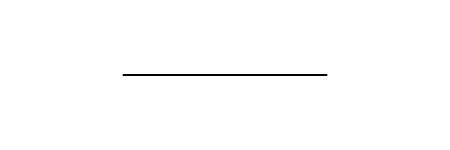

In [7]:
Chem.MolFromSmiles('CC') #ethane

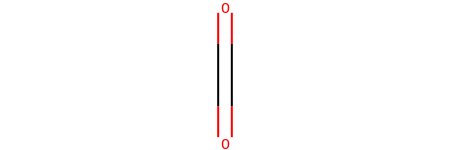

In [8]:
Chem.MolFromSmiles('O=C=O') #carbon dioxide

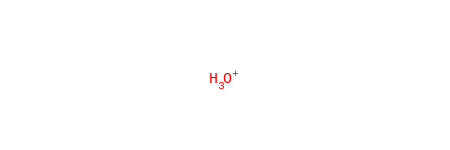

In [10]:
Chem.MolFromSmiles('[OH3+]') #hydronium ion

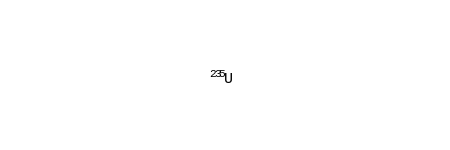

In [12]:
Chem.MolFromSmiles('[235U]') #uranium-235

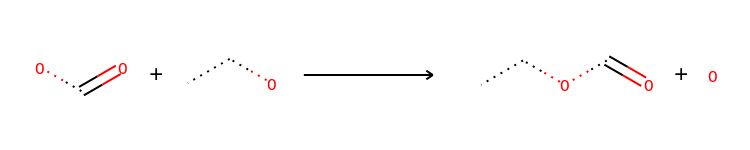

In [15]:
AllChem.ReactionFromSmarts('(C(=O)O).(OCC)>>(C(=O)OCC).(O)')

###SMILES를 사용하는 예시


1.   데이터베이스 액세스를 위한 키
2.   연구원들이 화학 정보를 교환하는 메커니즘
3.   화학 데이터 입력 시스템
4.   인공 지능 또는 화학 전문가 시스템 언어의 일부 


##Canoncalization(정규화)
  SMILES는 분자 구조를 선 2차원 그림으로써 분자 구조를 나타냅니다. 카이랄 또는 동위 원소 정보는 없이 원자 및 결합만 나타내는 SMILES를 generic SMILES이라고 하고 하나의 특수한 일반 SMILES를 생성하기 위한 표준화 알고리즘을 Unique SMILES, 동위 원소 및 카이랄을 나타내는 SMILES를 isomeric SMILES라고 합니다. Unique isomeric SMILES를 absolute SMILES라고 합니다.


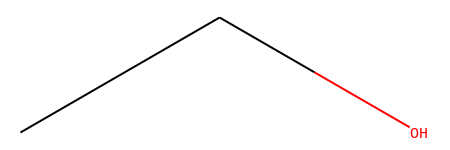

In [16]:
Chem.MolFromSmiles('OCC')

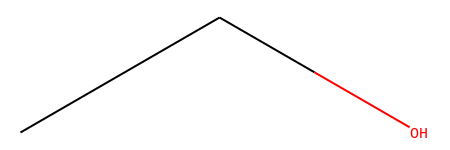

In [17]:
Chem.MolFromSmiles('[CH3][CH2][OH]')

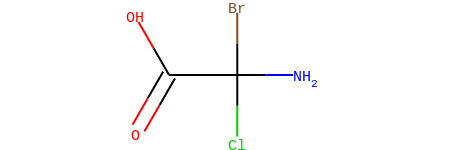

In [18]:
Chem.MolFromSmiles('OC(=O)C(Br)(Cl)N')

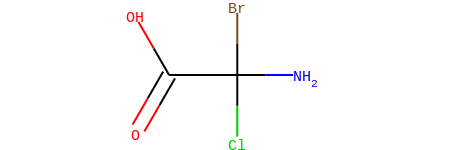

In [20]:
Chem.MolFromSmiles('O=C(O)C(N)(Br)Cl')

다른 SMILES를 입력하였으나 나타내는 분자구조는 같습니다.

### Unique SMILES 확인하는 방법

In [21]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCC'))

'CCO'

In [22]:
Chem.MolToSmiles(Chem.MolFromSmiles('[CH3][CH2][OH]'))

'CCO'

In [24]:
Chem.MolToSmiles(Chem.MolFromSmiles('OC(=O)C(Br)(Cl)N'))

'NC(Cl)(Br)C(=O)O'

In [23]:
Chem.MolToSmiles(Chem.MolFromSmiles('O=C(O)C(N)(Br)Cl'))

'NC(Cl)(Br)C(=O)O'

##2 SMILES Specification Rules(SMILES 명시 규칙)

SMILES 표기법은 공백이 없는 일련의 문자로 구성되고 수소 원자는 생략되거나 포함 될 수 있습니다. 방향족 구조는 직접  또는 Kekule 방식으로 나타낼 수 있다. SMILES 인코딩 규칙에는 일반적으로 원자, 결합, 가지, 고리 닫힘, 단절 다섯 가지가 있습니다.




###2.1 Atom(원자)

원자는 원자 기호로 표시되어지고 SMILES에서 유일하게 필요한 문자 사용입니다. 수소가 아닌 원자는 []로 묶인 원자 기호로 독립적으로 나타낼 수 있습니다. organic subset인 B,C,N,O,P,S,F,Cl,Br,I 는 부착된 수소의 수가 최저 원자가를 따르는 경우 괄호 없이 나타낼 수 있습니다. 여기서 최저 원자가는 B(3),C(4),N(3,5),O(2),P(3,5),S(2,4,6),할로젠 원소(1)으로 나타내어 지는 것을 말합니다. 지방족 탄소는 대문자 C로 나타내어지고 방향족 탄소는 소문자 c로 나타냅니다.



ex)괄호없이 쓸 수 있는 SMILES


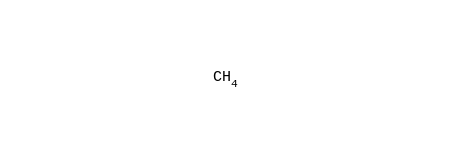

In [25]:
Chem.MolFromSmiles('C')#methane

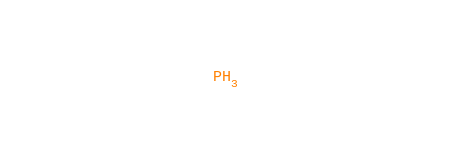

In [26]:
Chem.MolFromSmiles('P')#phosphine

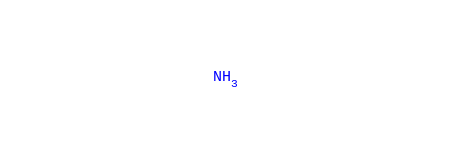

In [27]:
Chem.MolFromSmiles('N')#ammonia

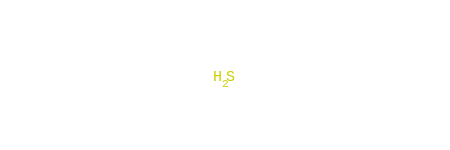

In [28]:
Chem.MolFromSmiles('S')#hydrogen sulfide

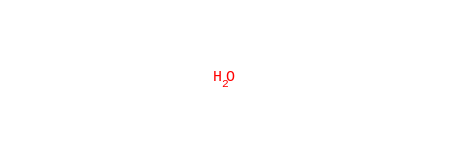

In [29]:
Chem.MolFromSmiles('O')#water

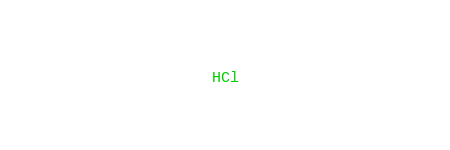

In [30]:
Chem.MolFromSmiles('Cl')#hydrochloric acid

ex)괄호가 있어야 쓸 수 있는 SMILES

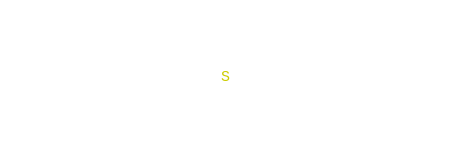

In [31]:
Chem.MolFromSmiles('[S]')#elemental sulfur

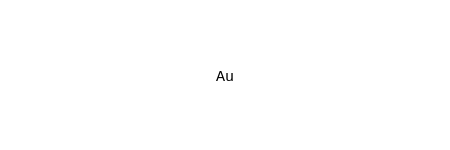

In [32]:
Chem.MolFromSmiles('[Au]')#elemental gold

In [33]:
Chem.MolFromSmiles('Au')

RDKit ERROR: [11:37:36] SMILES Parse Error: syntax error for input: 'Au'


이런식으로 []를 사용하지 않으면 오류가 나온다

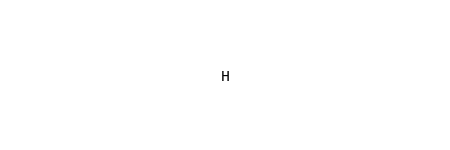

In [35]:
Chem.MolFromSmiles('[H]')#Hydrogen Atom

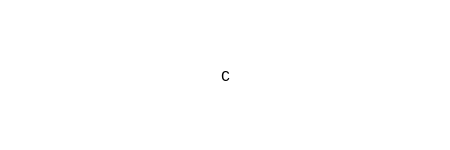

In [36]:
Chem.MolFromSmiles('[C]')#elemental carbon(Graphite)

괄호안에서 부착 된 수소와 전하는 항상 지정되어야합니다. 부착 된 수소의 수는 기호 H와 선택적 숫자로 표시가 되고 전하는 +또는 - 기호 중 한나와 숫자로 표시되어집니다. 지정되지 않은 경우 전하는 0으로 가정되어지고 숫자를 이용하지 않고 +나 -를 그 수만큼 사용하여 나타내어도 됩니다. ex) [Fe++]=[Fe+2]

ex)SMILES로 나타낸 전하


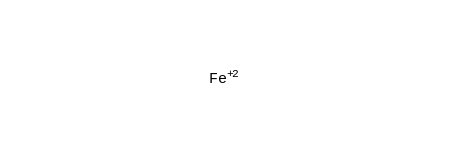

In [37]:
Chem.MolFromSmiles('[Fe++]')#iron(ll)cation

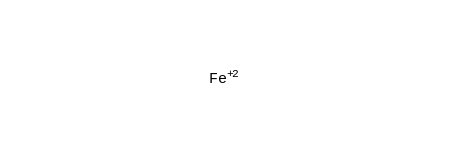

In [38]:
Chem.MolFromSmiles('[Fe+2]')#iron(ll)cation

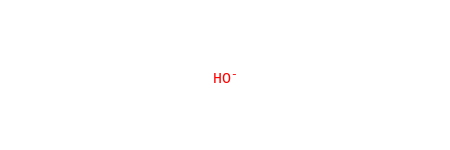

In [40]:
Chem.MolFromSmiles('[OH-]')#hydroxyl anion

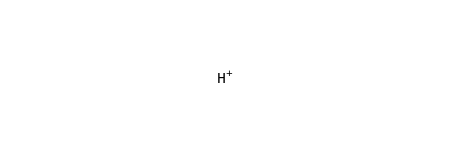

In [41]:
Chem.MolFromSmiles('[H+]')#proton

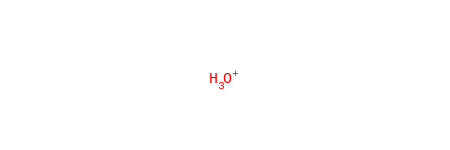

In [42]:
Chem.MolFromSmiles('[OH3+]')#hydronium cation

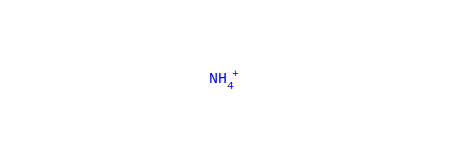

In [43]:
Chem.MolFromSmiles('[NH4+]')#	ammonium cation

###2.2 Bonds(결합)
단일, 이중, 삼중 및 방향족 결합은 각각 -,=,# 및 : 으로 표시됩니다. 인접 원자는 단일 또는 방향족 결합에 의해 서로 연결되어 있는 것으로 가정됩니다. 단일 및 방향족 결합은 항상 생략 될 수 있습니다.

ex) 결합을 나타내는 SMILES


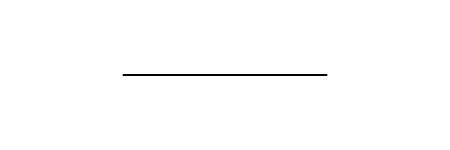

In [44]:
Chem.MolFromSmiles('CC')#ethane

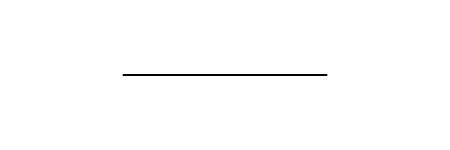

In [45]:
Chem.MolFromSmiles('C-C')#ethane

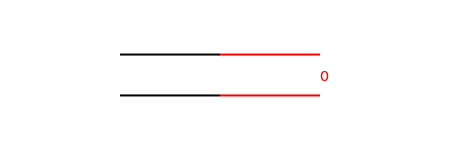

In [46]:
Chem.MolFromSmiles('C=O')#formaldehyde

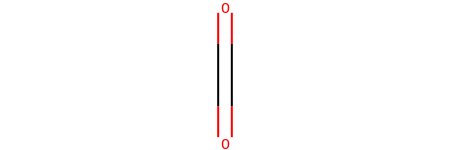

In [47]:
Chem.MolFromSmiles('O=C=O')#carbon dioxide

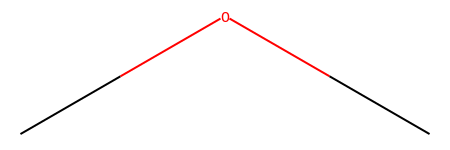

In [48]:
Chem.MolFromSmiles('COC')#	dimethyl ether

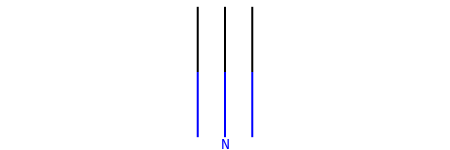

In [49]:
Chem.MolFromSmiles('C#N')#hydrogen cyanide

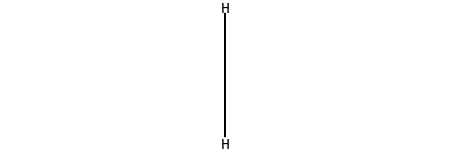

In [50]:
Chem.MolFromSmiles('[H][H]')#molecular hydrogen


선형 구조의 경우, SMILES 표기법은 수소 및 단일 결합이 일반적으로 생략된다는 점을 제외하고는 일반적인 표기법에 해당됩니다. ex) 6-hydroxy-1,4-hexadiene은 여러가지의 SMILES로 나타낼 수 있습니다.

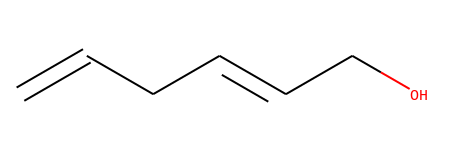

In [52]:
Chem.MolFromSmiles('C=C-C-C=C-C-O')

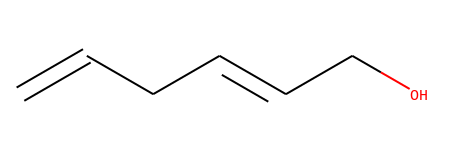

In [53]:
Chem.MolFromSmiles('C=CCC=CCO')

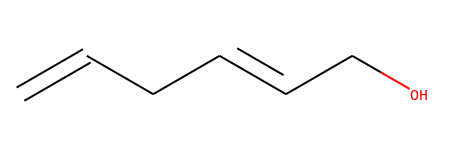

In [55]:
Chem.MolFromSmiles('OCC=CCC=C')

###2.3 Branch(가지)

가지는 소괄호로 묶어 지정되고 중첩되거나 쌓일 수 있습니다. 소괄호로 묶은 식에 대한 연결은 왼쪽에 있는 원자상에 있습니다.


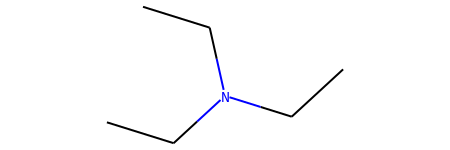

In [56]:
Chem.MolFromSmiles('CCN(CC)CC')#Triethylamine

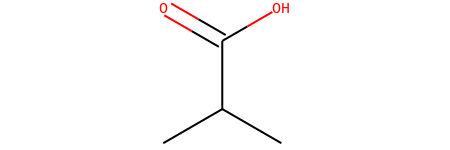

In [57]:
Chem.MolFromSmiles('CC(C)C(=O)O')#Isobutyric acid

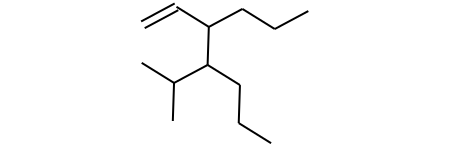

In [58]:
Chem.MolFromSmiles('C=CC(CCC)C(C(C)C)CCC')#3-propyl-4-isopropyl-1-heptene(가지속의 가지 표현가능)

### 2.4 Cyclic Structures(순환 구조)
고리 구조는 각 고리에서 하나의 결합을 끊는 것으로 표현되어집니다. 고리 폐쇄를 원자 기호 바로 다음에 숫자를 넣어주는것으로 고리 개방을 나타내어 줍니다. 

ex)Cyclohexane

![Cyclohexane](http://www.daylight.com/dayhtml/doc/theory/theory4.gif)



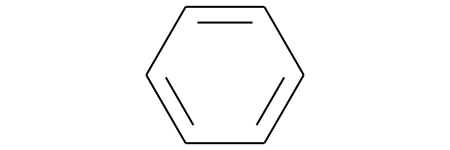

In [59]:
Chem.MolFromSmiles('c1ccccc1')#Cyclohexane

단일 원자는 둘 이상의 고리 폐쇄를 가질 수 있습니다.

ex)cubane

![Atom with 2ring](http://www.daylight.com/dayhtml/doc/theory/theory6.gif) <br><br>


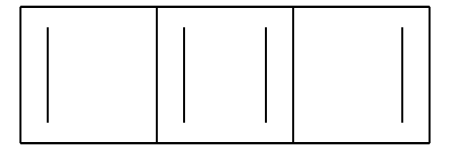

In [69]:
Chem.MolFromSmiles('c12c3c4c1c5c4c3c25')#Cubane

필요한 경우, 고리 닫힘을 나타내는 숫자를 재사용 할 수 있습니다. 

![reuse#](http://www.daylight.com/dayhtml/doc/theory/theory7.gif)
<br><br>
O1CCCCC1N1CCCCC1

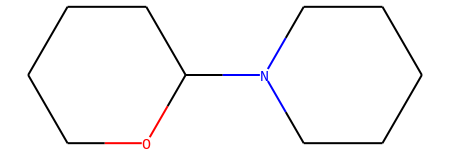

In [70]:
Chem.MolFromSmiles('O1CCCCC1N1CCCCC1')

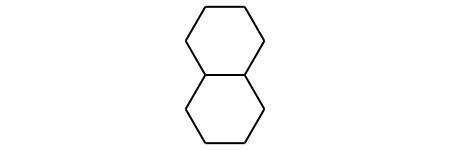

In [73]:
Chem.MolFromSmiles('C12CCCCC1CCCC2')#Decalin

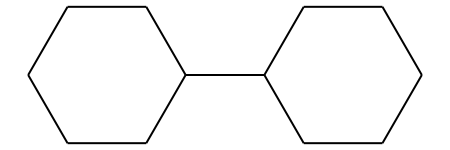

In [74]:
Chem.MolFromSmiles('C1CCCCC1C1CCCCC1')#Bicyclohexane

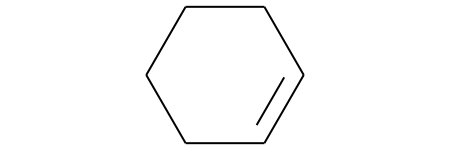

In [75]:
Chem.MolFromSmiles('C1=CCCCC1')#Cyclohexene

###2.5 Disconnected Structures(분리된 구조)
분리된 화합물은 "."을 이용하여 구분 된 개별 구조로 작성됩니다. 이온 또는 리간드(ligand)가 나열되는 순서는 임의적입니다. 한 전하와 다른 전하가 연결되어 있지 않으며 또한 전하를 가지고 있지 않아도 됩니다. 하나의 이온 SMILES는 다른 이온 내에 매립 될 수 있습니다. 


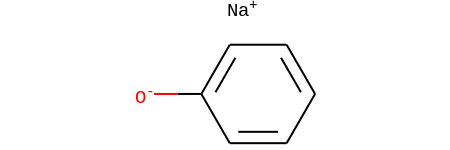

In [76]:
Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')#sodium phenoxide

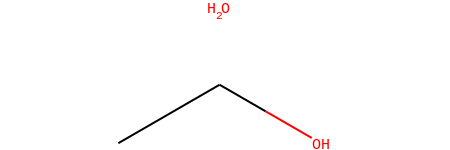

In [77]:
Chem.MolFromSmiles('CCO.O')#Ethanol and Water

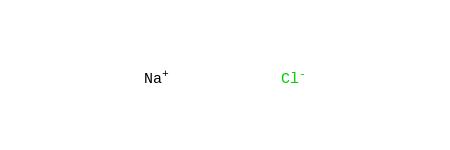

In [78]:
Chem.MolFromSmiles('[Na+].[Cl-]')#Sodium Chloride

##3 Isomeric SMILES(이성질체 SMILES)

SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분적 명SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분적 명시를 할 수 있습니다. SMILES의 모든 이성질체 규칙은 선택 사항이고 이러한 내용이 들어가 있지 않는다면 지정된 값이 없다는 것을 의미합니다.


###3.1 Isotopic Specification(동위원소)

동위 원소는 동위원소의 질량을 숫자로 원자 기호 앞에 표시합니다.


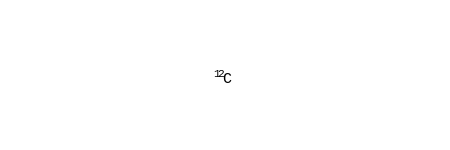

In [79]:
Chem.MolFromSmiles('[12C]')#carbon-12

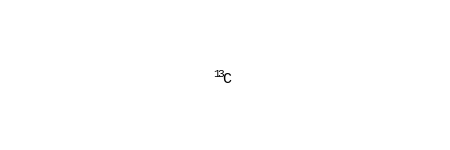

In [80]:
Chem.MolFromSmiles('[13C]')#carbon-13

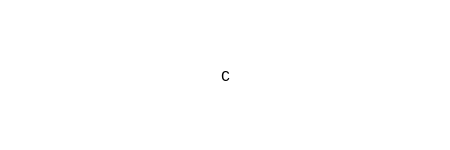

In [81]:
Chem.MolFromSmiles('[C]')#carbon

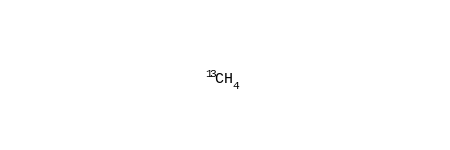

In [82]:
Chem.MolFromSmiles('[13CH4]')#C-13 methane

###3.2 Configuration Around Double Bonds(이중결합을 둘러싼 배열)

이중결합을 둘러싼 배열은 "directional bonds(방향결합)"을 나타내는 문자인 /와\를 이용하여 나타낼 수 있고 단일 또는 방향족  결합의 종류로 생각할 수 있습니다. 기호는 연결된 원자 사이의 상대적인 방향성을 나타내며, 이중 결합 된 두 원자 모두에서 발생하는 경우에만 의미가 있습니다. 




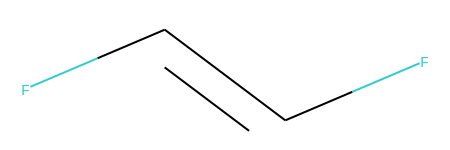

In [83]:
Chem.MolFromSmiles('F/C=C/F')#E-1,2-difluoroethene


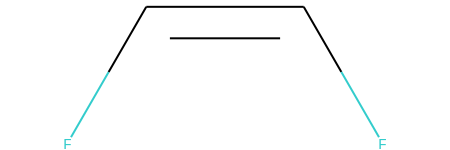

In [84]:
Chem.MolFromSmiles('F/C=C\F')#Z-1,2-difluoroethene

SMILES의 카이랄성 규약과 CIP같은 규약의 차이점은 SMILES는 부분적인 명시를 통하여 국부적으로 카이랄성을 나타낼 수 있다는 것입니다.


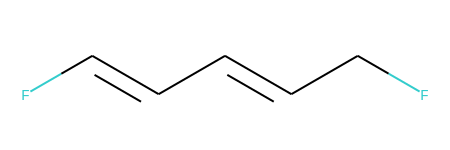

In [86]:
Chem.MolFromSmiles('F/C=C/C=C/CF')#completely specified

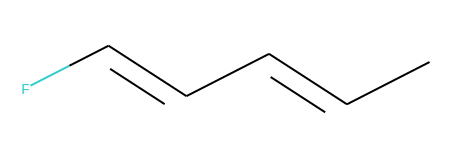

In [87]:
Chem.MolFromSmiles('F/C=C/C=CC')#partially specified

###3.3. Configuration Around Tetrahedral Centers(사면체의 중심을 포함하는 구조)

SMILES는 국부적 카이랄성에 기반한 매우 일반적인 카이랄성 명시법을 사용합니다. 방향은 SMILES 문자열에서 인접 항목 순으로 나타냅니다. SMILES에서 사면체의 중심은 카이랄 원자의 원자 기호 다음에 @ 또는 @@ 두개를 사용하여 표시합니다. 카이랄 원자에 대해 명시가 되지 않을 경우 카이랄성은 지정되지 않습니다. 
 " @ "는 이웃하는 원자들이 시계 반대 방향으로 나열됨을 나타내고 " @@ "는 이웃하는 원자들이 시계 방향으로 나열되어 있음을 나타냅니다.

 중심 탄소가 SMILES에 첫 번째 원자가 아니고 수소가 부착되어 있으면 수소는 다음에 나오는 세 이웃 원자들 중 첫 번째 원자로 간주되어집니다. 중심 탄소가 SMILES에서 첫 번째 원자라면 내제 된 수소는 원자로 간주되어집니다. 수소가 명시적으로 나타내어 질 경우 다른 원자와 같이 취급됩니다.




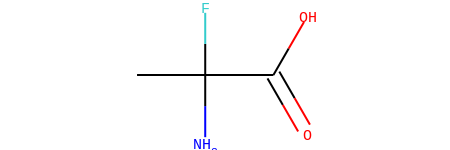

In [88]:
Chem.MolFromSmiles('NC(C)(F)C(=O)O')#unspecified chirality

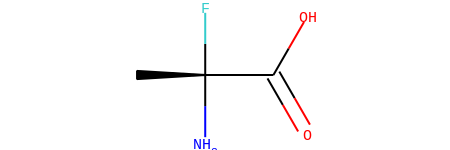

In [89]:
Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')#specified chirality

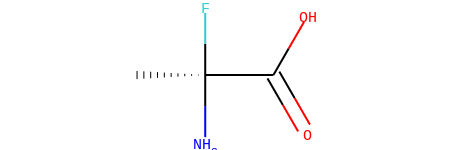

In [90]:
Chem.MolFromSmiles('N[C@@](C)(F)C(=O)O')#specified chirality

고리 닫힘 결합의 카이랄 순서는 고리 닫힘 숫자가 카이랄 원자 상에 나타나는 순서에 의해 나타내어 집니다.

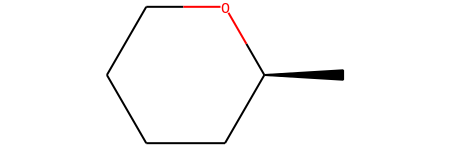

In [91]:
Chem.MolFromSmiles('C[C@H]1CCCCO1')

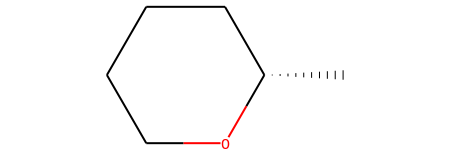

In [92]:
Chem.MolFromSmiles('O1CCCC[C@@H]1C')

###3.4 General Chiral Specification(일반적 카이랄 사양)

사면체 구조 외에 많은 종류의 카이랄성이 존재합니다. 위에서 사용하였던 "@"기호는 일반적인 카이랄 사양 중 특별한 경우에 사용합니다.

일반적 카이랄 사양에는 "@"기호, 2문자 카이랄 클래스 표시  지표, 수적 순열 지정이 있습니다. 기본적인 카이랄 클래스는 각각의 차수 즉 연결 수에 따라 할당 됩니다. 4개의 연결에 대한 기본 클래스는 위에서 보았던 4면체(TH)이다.
대부분의 경우 @1표시는 SMILE의 순서를 기준으로한 축에 반시계 방향으로 @2표시는 시계방향을 의미합니다.
'@@'와 '@@@'는 '@2'와'@3'으로 해석됩니다.
"@@"및 "@@@" 형식의 표기법은 앞에서 전하를 나타낸 것과 같이 "@2"및 "@3"을 나타냅니다.위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것입니다. SMILES는 대칭으로 인하여 감소된 거울상 이성질체를 뜻하는 "감소된 카이랄성"과 중심치환으로 인해 중심이 비카이랄성이 되는 "퇴화한 카이랄성"을 포함하여 넓은 범위를 다룰 수 있습니다. SMILES 시스템은 특정 사양에 대해 고유 한 이성질체 SMILES를 생성하며 모든 유형의 키랄성에서 인식이 올바르게 작동하도록 합니다.

 사면체, 유사 알렌(allen-like), 정사각형, 삼각뿔, 팔면체 등의 카이랄이 있고 이 5가지는 매우 흔하고 자주 다루어 집니다.




####유사 알렌(allen-like) 

유사 엘렌 클래스의 기호는 AL로 나타낸다. 2차수의 카이랄 클래스 default이고 중심원자는 이중 결합을 가집니다. 치환 된 C = C = C 구조가 가장 흔하지 만, C = C = C = C = C 구조와 같이 홀수 개의 일련의 이중 결합 원자원자도  유사 알렌에 포함됩니다. @ AL1 (@)과 @ AL2 (@@)을 사용하여 나타내고 치환된 원자의 중첩과 각각의 사면체의 평가에 의해 해석됩니다. 치환된 유사알렌 원자에 부착 된 수소는 그 원자 바로 뒤에 있는 것으로 간주되어 집니다.


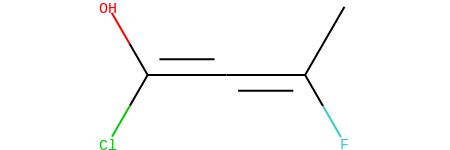

In [94]:
Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')

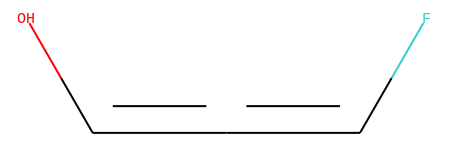

In [95]:
Chem.MolFromSmiles('OC=[C@]=CF')

####정사각형

정사각형 클래스의 기호는 SP로 나타냅니다. 

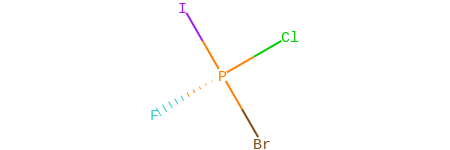

In [113]:
Chem.MolFromSmiles('F[P@](Cl)(Br)I')

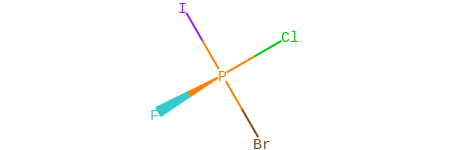

In [114]:
Chem.MolFromSmiles('F[P@@](Cl)(Br)I')

####삼각뿔형

삼격뿔 형의 클래스 기호는 TB입니다. 이것은 차수가 5인 기본 카이랄 클래스입니다. 가능한 값은 @TB1 ~ @TB20까지 있습니다. @TB1(@)은 한 축 연결에서 다른 축 연결로 나열 될 때 3개의 수평적으로 연결된 중간원자가 시계 반대 방향으로 나열됨을 나타내고 @TB2(@@)는 시계 방향으로 나열됨을 나타냅니다.

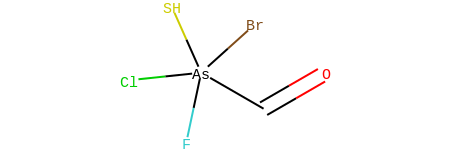

In [119]:
Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')

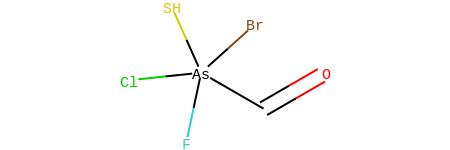

In [120]:
Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S')

####8면체

8면체 클래스의 기호는 OH입니다. 차수 6을 가지는 기본 카이랄 클래스이고 사용하는 값은 @OH1 ~ @OH30을 사용합니다. @OH1(@)는 한 축연결에서 다른 축 연결로 나열될때 수평적으로 연결된 4개의 중간 원자가 반 시계 방향으로 나열됨을 나타냅니다. @OH2(@@)는 시계 방향을 나타냅니다.

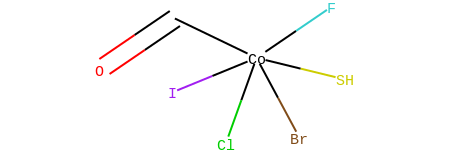

In [121]:
Chem.MolFromSmiles('S[Co@@](F)(Cl)(Br)(I)C=O')

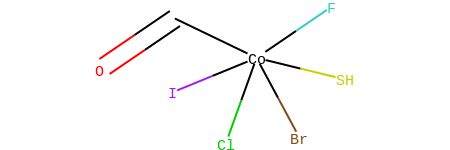

In [122]:
Chem.MolFromSmiles('O=C[Co@](F)(Cl)(Br)(I)S')

## 4. SMILES Conventions(관례)
앞의 규칙 외에도 SMILES에서 사용되는 몇가지 관례들이 있습니다.

###4.1 Hydrogens(수소)
SMILES로 작성할 때 대부분의 유기 구조에서 수소 원자는 일반적으로 생략됩니다. 수소의 존재는 세가지 방식으로 표시될 수 있습니다.
 * 암시적인 방식 : 일반적인 원자가 가정으로부터 대괄호([ ])로 표시되지 않은 원자
 * 명시적인 방식 : 대괄호([ ])안에 수소의 수를 표시
 * 수소 원자 : **[H]**원자

또한 유기 및 무기 명명법에는 차이가 없습니다.

수소를 명확하게 표시해줘야 하는 4가지 경우가 있습니다.
 * 전하를 가지는 수소 : **[H+]**
 * 다른 수소와 연결된 수소 : 분자수소(**[H][H]**)
 * 두개 이상의 다른 원자와 연결된 수소 : bridging hydrogens
 * 동위원소 수소 : 중수(**[2H]O[2H]**)

RDKit WARNING: [16:08:38] WARNING: not removing hydrogen atom without neighbors


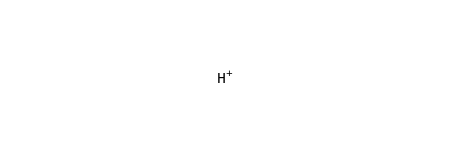

In [0]:
Chem.MolFromSmiles('[H+]')

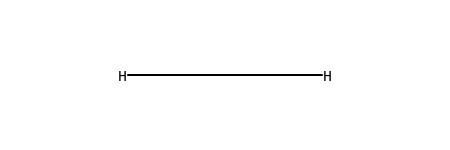

In [0]:
Chem.MolFromSmiles('[H][H]')


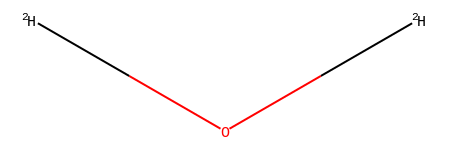

In [0]:
Chem.MolFromSmiles('[2H]O[2H]')

### 4.2 Aromaticity(방향성)
분자의 대칭성을 특징짓기 위해 SMILES와 같은 시스템에서 방향성에 대한 명확한 화학 명명법이 추론되어야 한다. 효과적인 방향족 검출 알고리즘이 주어지면, 사용자가 지방족(Kekulé-like) 구조입력을 선호하는 경우 방향성으로 입력할 필요가 없다. 방향성으로 구조물을 입력하면 짧게 입력해서 정확한 화학구조를 얻을 수 있다.

SMILES 알고리즘은 확장된 버전의 Hueckel 규칙을 사용하여 방향족 분자 및 이온을 식별합니다.
> 방향족으로서 자격을 갖기 위해서는
> 1. 고리의 모든 원자가 $sp^{2}$ 혼성화 되어있어야 한다.
> 2. 고리에 (4N+2)개의 $\pi$전자를 가져야한다.

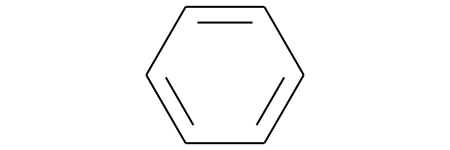

In [0]:
Chem.MolFromSmiles('c1ccccc1') #aromatic

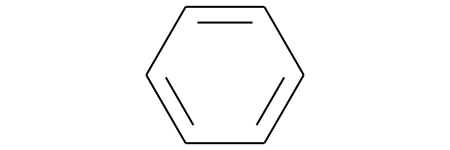

In [0]:
Chem.MolFromSmiles('C1=CC=CC=C1') #aliphatic

조건에서 2번을 만족하지 않는것을 anti-aromatic이라고 한다 c1ccc1, c1ccccccc1 같은 경우가 있는데 SMILES 시스템에서 내재된 $sp^{2}$혼성화, 수소 수 및 지정된 공식전하(있는 경우)를 보존하는 구조를 찾습니다. 따라서 C1=CC=C1와 C1=CC=CC=CC=C1에 대한 정확한 anti-aromatic 구조를 생성합니다.

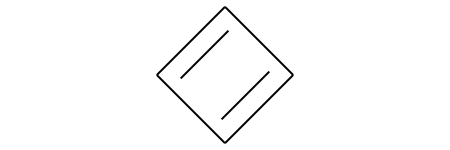

In [0]:
Chem.MolFromSmiles('c1ccc1') #anti-aromatic

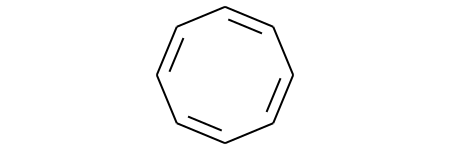

In [0]:
Chem.MolFromSmiles('c1ccccccc1') #anti-aromatic

그러나 c1cccc1과 같은 일부 입력은 정확하지 않을 수도 있고 불가능할 수도 있습니다. 여기서 탄소 원자 중 하나가 2개의 수소가 부착된 $sp^{3}$이기 때문에 c1cccc1은 C1=CCC=C1으로 전환될 수 없다. 이러한 구조에서 단일 및 이중결합이 교대로 이루어질 수 없기 때문에 SMILES 시스템은 이를 "불가능한" 입력이라고 표시합니다. 또한 고리 밖에 있는 이중결합은 방향성을 파괴하지 않는다.

In [0]:
Chem.MolFromSmiles('c1cccc1') #aromatic으로 입력했지만 aromatic이 아니기에 오류가 발생

RDKit ERROR: [16:08:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


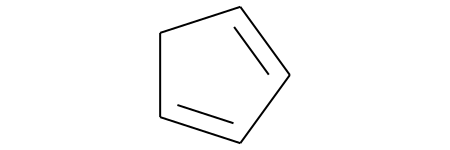

In [0]:
Chem.MolFromSmiles('C1=CCC=C1') #aliphatic

몇가지 추가적인 aromatic

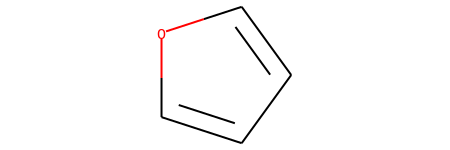

In [0]:
Chem.MolFromSmiles('c1cocc1')

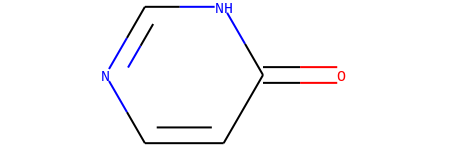

In [0]:
Chem.MolFromSmiles('c1cnc[nH]c(=O)1')

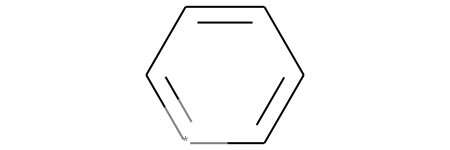

In [0]:
Chem.MolFromSmiles('c1c*ccc1') # *은 와일드카드

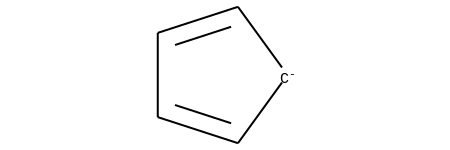

In [0]:
Chem.MolFromSmiles('[cH-]1cccc1')

### 4.3 Aromatic Nitrogen Compounds(방향족 질소 화합물)
방향족 질소의 경우 방향족 질소 기호인 n으로 지정될 수 있다.

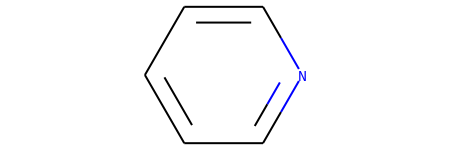

In [0]:
Chem.MolFromSmiles('n1ccccc1') # pyridine

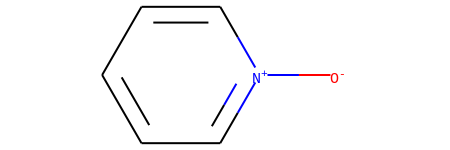

In [0]:
Chem.MolFromSmiles('O=n1ccccc1') # pyridine-N-oxide

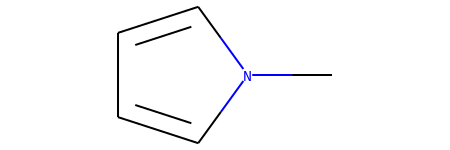

In [0]:
Chem.MolFromSmiles('Cn1cccc1') # methylpyrrole

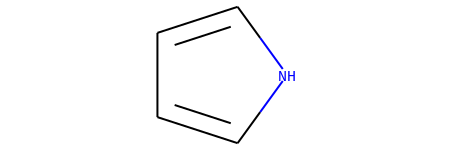

In [0]:
Chem.MolFromSmiles('[nH]1cccc1') # pyrrole

In [126]:
Chem.MolFromSmiles('n1cccc1') # pyrrole

RDKit ERROR: [12:37:37] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


nH를 사용하지 않으면 결합을 확실히 알 수 없기 문에 오류가 난다.

pyrrole의 질소는 pyridine의 질소와 구별하기 위해서 **[nH]**라고 쓴다.

### 4.4 Bonding Conventions (결합 관례)
SMILES는 분자 구조를 모델링하기 위해 어떤 원자가 규칙을 사용해야하는지 지시하지 않습니다.SMILES를 사용하면 동일한 구조를 다양한 모델로 설명할 수 있고 원하는대로 원자의 전하를 나타낼 수 있다는 장점이 있습니다.

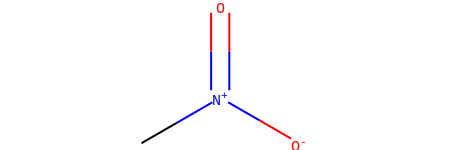

In [0]:
Chem.MolFromSmiles('CN(=O)=O') # nitromethane

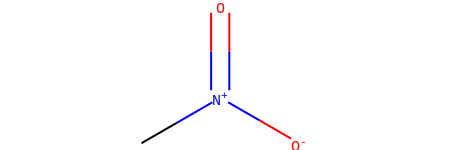

In [0]:
Chem.MolFromSmiles('C[N+](=O)[O-]') # nitromethane

일반적으로 대칭성이 문제가 되지 않는 경우 특이한 원자가 상태에서 원자를 나타내는 것을 피할 수 있으면 전하 분리 구조를 선호합니다. 예를 들어 diazomethane은 C=[N]=[N]보다 C=[N+]=[N-]로 하는 것을 선호합니다.

In [125]:
Chem.MolFromSmiles('C=N=N') # diazomethane

RDKit ERROR: [12:37:03] Explicit valence for atom # 1 N, 4, is greater than permitted


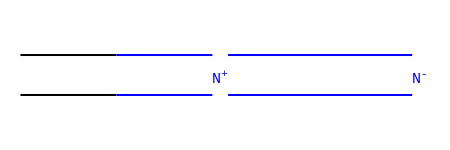

In [0]:
Chem.MolFromSmiles('C=[N+]=[N-]') # diazomethane

### 4.5 Tautomers
Tautomeric 구조는 SMILES에서 명확하게 지정된다. "tautomeric bond", "mobile hydrogen", "mobile charge"에 대해 정해진 것은 없다. 하나의 tautomeric form을 고려할 때 대부분의 화학 정보 시스템은 필요한 경우 알려진 모든 tautomer에 대한 데이터를 보고할 것이다. SMILES의 역할은 요청된 tautomeric form과 데이터가 있는 위치를 정확히 지정하는 것이다.

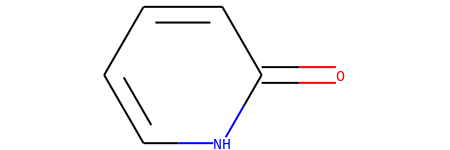

In [0]:
Chem.MolFromSmiles('O=c1[nH]cccc1') # 2-pyridone

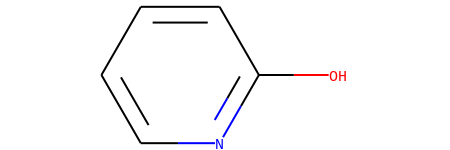

In [0]:
Chem.MolFromSmiles('Oc1ncccc1') # 2-pyridinol

참고 자료  
https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

 
https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html

rdkit download

https://gist.github.com/philopon/a75a33919d9ae41dbed5bc6a39f5ede2

SMILES Database

- [GDB Databases](http://gdb.unibe.ch/downloads/)

출처를 명시한다는 조건하에 무료로 다운로드가 가능한 데이터베이스

- [DrugCentral](http://drugcentral.org/download)

CAS 등록 번호(CAS Registry Number[1], CASRN 또는 CAS 번호)는 이제까지 알려진 모든 화합물, 중합체 등을 기록하는 번호이다. 미국 화학회 American Chemical Society에서 운영하는 서비스이며, 모든 화학 물질을 중복 없이 찾을 수 있도록 한다.


In [0]:
import pandas as pd

dataset = pd.read_csv("structures.smiles.tsv", delimiter='\t', header=0)

print(dataset)

                                                 SMILES  ...        CAS_RN
0                 CCCCN1CCCC[C@H]1C(=O)NC1=C(C)C=CC=C1C  ...    27262-47-1
1     COC(=O)C1=C(C)NC(C)=C([C@H]1C1=CC(=CC=C1)[N+](...  ...    76093-36-2
2     CCOC(=O)C1=C(C)NC(C)=C([C@@H]1C1=CC(=CC=C1)[N+...  ...    80873-62-7
3         C[C@@H](CCC1=CC=C(O)C=C1)NCCC1=CC=C(O)C(O)=C1  ...    61661-06-1
4     NC1=NC2=NC=C(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(O...  ...       54-62-6
...                                                 ...  ...           ...
3976  CC[C@H](C)[C@H](NC(=O)[C@H](CC1=CC=C(O)C=C1)NC...  ...     4474-91-3
3977  OC1=C2N(C[C@H]3O[C@@H]4CC[C@@H](C4)N3C2=O)C=C(...  ...  1611493-60-7
3978  CC(C)(CO)C1=CC2=C(C=C(F)C(NC(=O)C3(CC3)C3=CC=C...  ...  1152311-62-0
3979  CCCCC1(CCCC)CN(C2=CC=CC=C2)C2=C(C=C(OCC(=O)N[C...  ...   439087-18-0
3980  CNC(=O)C1=CC=C(C=C1F)N1C(=S)N(C(=O)C11CCC1)C1=...  ...   956104-40-8

[3981 rows x 6 columns]
